#Parte 1: Exploración y Visualización de Datos (EDA)

In [ ]:
!pip install lightgbm optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 17.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

#Fuente de datos
from google.colab import drive

#Vsiualizacion
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

#Pipeline
from sklearn.pipeline import Pipeline

#Modelos de regresión
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#LGBM
from sklearn.datasets import load_breast_cancer
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

#Evaluar
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

## 1. Carga y Exploración Inicial de Datos:


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Cargar el dataset y revisar su estructura básica.

In [ ]:
#Carga el archivo retail_sales.csv en un DataFrame de Pandas.
path = "/content/drive/MyDrive/SONDA | Data Science/Data Science Fundamentals/BBDD/retail_sales_dataset.csv"
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Describir las variables y su distribución.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,41.392,13.681430,18.0,29.00,42.0,53.00,64.0
Quantity,1000.0,2.514,1.132734,1.0,1.00,3.0,4.00,4.0
Price per Unit,1000.0,179.890,189.681356,25.0,30.00,50.0,300.00,500.0
Total Amount,1000.0,456.000,559.997632,25.0,60.00,135.0,900.00,2000.0


Identificar y tratar valores nulos y outliers.


In [ ]:
#Existen nulos?
df.isnull().values.any()


np.False_

In [ ]:
#duplicados
df.duplicated().any()


np.False_

## 2.Análisis de Correlación

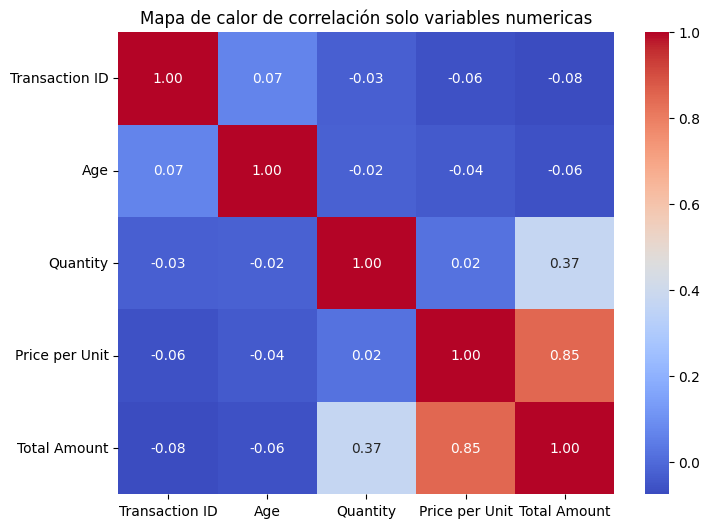

In [ ]:
num_col_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(num_col_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación solo variables numericas')
plt.show()

De esta matriz podemos extraer la correlacion entre las variables numericas:
Productos más caros generan monto total más alto (Price per Unit y Total Amount)

Age tiene correlación muy baja con las otras variables de compra. Esto indica que, en general, la edad no influye mucho en la cantidad comprada ni en el monto total.

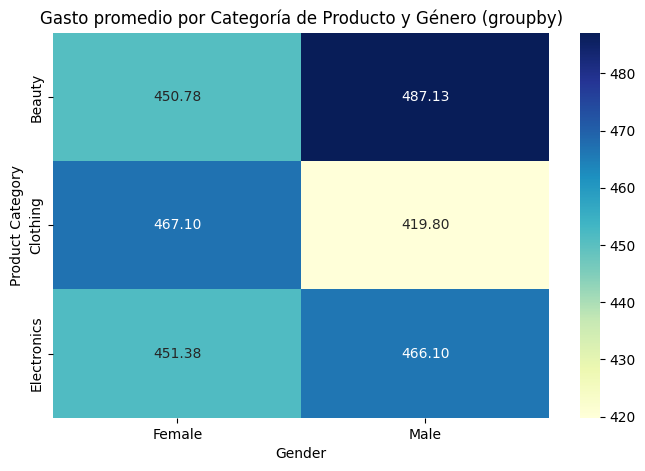

In [ ]:
total_amoutn_prod_gender = df.groupby(['Product Category', 'Gender'])['Total Amount'].mean().unstack()

# 3) Crear mapa de calor
plt.figure(figsize=(8, 5))
sns.heatmap(total_amoutn_prod_gender, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Gasto promedio por Categoría de Producto y Género (groupby)')
plt.show()

Los hombres gastán más en la categoría Beauty.  
En ropa (Clothing) las mujeres gastan más.  
En Electronics los hombres gastan más.

## 3. Visualización de Datos

Histograma de edades


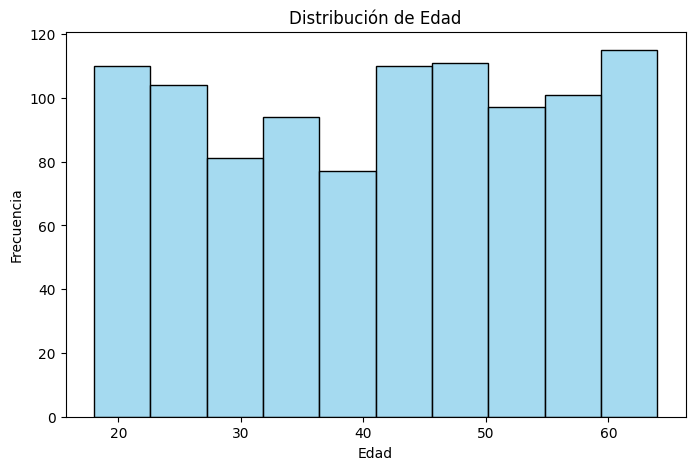

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, color='skyblue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Cantidad promedio por categoría de producto

/tmp/ipython-input-13-3165254108.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=agrupados_quantity, x='Product Category', y='Quantity', palette='pastel')


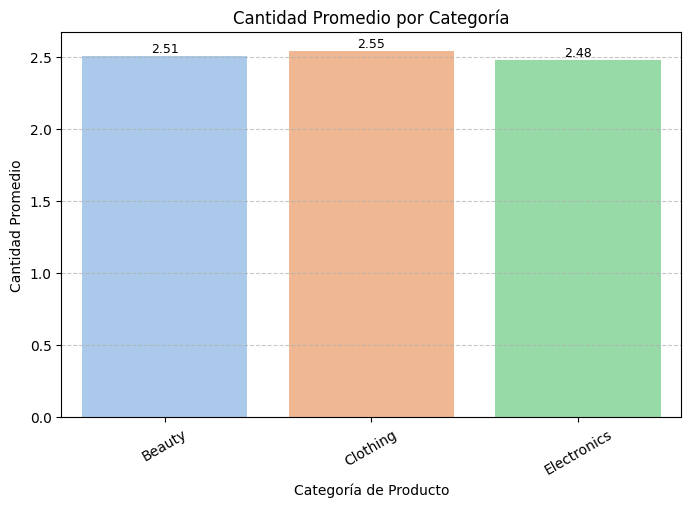

In [ ]:
agrupados_quantity = df.groupby('Product Category')['Quantity'].mean().reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=agrupados_quantity, x='Product Category', y='Quantity', palette='pastel')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Cantidad Promedio por Categoría')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad Promedio')
plt.xticks(rotation=30)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.show()


Gasto total por género

/tmp/ipython-input-15-3055649397.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gender', y='Total Amount', palette='muted')


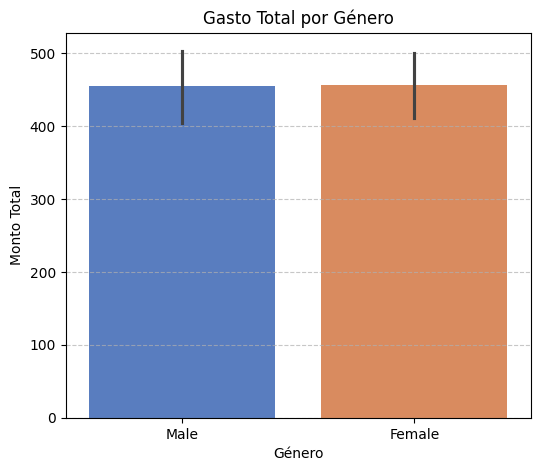

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(data=df, x='Gender', y='Total Amount', palette='muted')
plt.title('Gasto Total por Género')
plt.xlabel('Género')
plt.ylabel('Monto Total')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# Parte 2: Preprocesamiento de Datos

## 1. Transformación de Columnas  & 2. Pipelines

In [ ]:
df.head()
df = df.drop(columns=['Date'])
df = df.drop(columns=['Transaction ID', 'Customer ID']) #se eliminan las columnas que pueden ensuciar el modelaje

In [ ]:
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,Male,34,Beauty,3,50,150
1,Female,26,Clothing,2,500,1000
2,Male,50,Electronics,1,30,30
3,Male,37,Clothing,1,500,500
4,Male,30,Beauty,2,50,100


In [ ]:
# Definir features y target.
X = df.drop(columns="Total Amount")
y = df["Total Amount"]

In [ ]:
# Dividir en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definir transformadores.
num_cols = ["Age", "Quantity", "Price per Unit"]
nom_cols = ["Gender", "Product Category", ]

num_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler())  #escalo
])

nom_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore')) #handle_unknown='ignore' ignorar categorias nuevas (que no fueron entrenadas)
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_cols),
    ("nom", nom_pipeline, nom_cols)
])

#Parte 3: Benchmarking de Técnicas de Machine Learning

## 1. Selección de Modelos:

### DecisionTreeRegressor

In [ ]:
# Crear pipeline.
pipeline_arbol = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", DecisionTreeRegressor(max_depth=8, random_state=42))
])

# Entrenar modelo.
pipeline_arbol.fit(X_train, y_train)

# Predecir y evaluar.
y_pred_arbol = pipeline_arbol.predict(X_test)



### KNeighborsRegressor

In [ ]:
# Modelo.
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor),
    ("model", KNeighborsRegressor(n_neighbors=3))
])

# Entrenamiento.
pipeline_knn.fit(X_train, y_train)

# Prediccion.
y_pred_knn = pipeline_knn.predict(X_test)

### RandomForestRegressor

In [ ]:
# Modelo.
pipeline_forest = Pipeline([
    ("preprocessing", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])
# Entrenamiento.
pipeline_forest.fit(X_train, y_train)

# Prediccion.
y_pred_forest = pipeline_forest.predict(X_test)

In [ ]:
score_arbol = cross_val_score(pipeline_arbol, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
score_knn = cross_val_score(pipeline_knn, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
score_forest = cross_val_score(pipeline_forest, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
print(score_arbol)
print(score_knn)
print(score_forest)

[1. 1. 1. 1. 1.]
[0.95471904 0.9639715  0.97148504 0.96103128 0.95836824]
[1. 1. 1. 1. 1.]


##2. Comparación de Modelos:
Comparar los modelos utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.
Seleccionar el mejor modelo basado en las métricas obtenidas.


In [ ]:
#Arbol
mse_arbol = mean_squared_error(y_test, y_pred_arbol)
r2_arbol = r2_score(y_test, y_pred_arbol)

# KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Forest

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Árbol - MSE: {mse_arbol:.2f} | R2: {r2_arbol:.2f}")
print(f"KNN   - MSE: {mse_knn:.2f} | R2: {r2_knn:.2f}")
print(f"Forest- MSE: {mse_forest:.2f} | R2: {r2_forest:.2f}")

Árbol - MSE: 0.00 | R2: 1.00
KNN   - MSE: 6229.04 | R2: 0.98
Forest- MSE: 0.00 | R2: 1.00


# Parte 4: Análisis de Métricas

## 1. Informe de Clasificación

Los resultadosindican que el modelo DecisionTreeRegressor y RandomForestRegressor están prediciendo perfecto (R²=1, MSE=0) esto puede deberse a que hay sobreajuste.

In [ ]:
#Como es un modelo de regresion no tiene sentido hacer una matriz de confusión